<a href="https://colab.research.google.com/github/belovelace/Machine_learning_class/blob/main/Activity_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [2]:
# 파일 가져오기
from google.colab import drive
drive.mount('/content/drive')

TRAIN = "train/"
TEST = "test/"

DATASET_PATH = "/content/drive/MyDrive/AI_study/human activity/UCI HAR Dataset/UCI HAR Dataset/"

Mounted at /content/drive


In [3]:
def load_dataset():
    """Loads the UCI HAR dataset from the specified paths."""
    # Define paths to the data files
    train_x_path = os.path.join(DATASET_PATH, TRAIN, 'X_train.txt')
    train_y_path = os.path.join(DATASET_PATH, TRAIN, 'y_train.txt')
    test_x_path = os.path.join(DATASET_PATH, TEST, 'X_test.txt')
    test_y_path = os.path.join(DATASET_PATH, TEST, 'y_test.txt')

    print(f"Loading training data from: {train_x_path}")
    print(f"Loading training labels from: {train_y_path}")
    print(f"Loading testing data from: {test_x_path}")
    print(f"Loading testing labels from: {test_y_path}")

    # Load data using numpy for efficiency with large numerical datasets
    # These files usually contain space-separated floats or integers
    trainX = np.loadtxt(train_x_path)
    trainy = np.loadtxt(train_y_path)
    testX = np.loadtxt(test_x_path)
    testy = np.loadtxt(test_y_path)

    return trainX, trainy, testX, testy

In [4]:
df = load_dataset()

Loading training data from: /content/drive/MyDrive/AI_study/human activity/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt
Loading training labels from: /content/drive/MyDrive/AI_study/human activity/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt
Loading testing data from: /content/drive/MyDrive/AI_study/human activity/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt
Loading testing labels from: /content/drive/MyDrive/AI_study/human activity/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt


In [5]:


# Convert NumPy arrays in the tuple to pandas DataFrames for better visualization
trainX_df = pd.DataFrame(df[0].reshape(-1, df[0].shape[-1]))
trainy_df = pd.DataFrame(df[1])
testX_df = pd.DataFrame(df[2].reshape(-1, df[2].shape[-1]))
testy_df = pd.DataFrame(df[3])

# Define a mapping from numerical labels to activity names
activity_labels = {
    1: 'WALKING',
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING',
    5: 'STANDING',
    6: 'LAYING'
}

print("Training Data (X):")
display(trainX_df.head())

print("\nTraining Labels (y):")
# Map numerical labels to activity names for display
display(trainy_df.head().replace(activity_labels))

print("\nTesting Data (X):")
display(testX_df.head())

print("\nTesting Labels (y):")
# Map numerical labels to activity names for display
display(testy_df.head().replace(activity_labels))

Training Data (X):


,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892



Training Labels (y):


,0
0,STANDING
1,STANDING
2,STANDING
3,STANDING
4,STANDING



Testing Data (X):


,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857



Testing Labels (y):


,0
0,STANDING
1,STANDING
2,STANDING
3,STANDING
4,STANDING


In [6]:

print("Testing Labels (y) - 실제 값들:")
print("첫 5개 라벨:", df[3][:5])  # 실제 라벨 값
print("라벨별 개수:")
unique, counts = np.unique(df[3], return_counts=True)
for label, count in zip(unique, counts):
    print(f"{label}: {activity_labels[label]} - {count}개")

Testing Labels (y) - 실제 값들:
첫 5개 라벨: [5. 5. 5. 5. 5.]
라벨별 개수:
1.0: WALKING - 496개
2.0: WALKING_UPSTAIRS - 471개
3.0: WALKING_DOWNSTAIRS - 420개
4.0: SITTING - 491개
5.0: STANDING - 532개
6.0: LAYING - 537개


In [8]:
# 실제 라벨 값들 확인
print("Training labels unique values:", np.unique(df[1]))
print("Testing labels unique values:", np.unique(df[3]))
print("Training labels shape:", df[1].shape)
print("Testing labels shape:", df[3].shape)

Training labels unique values: [1. 2. 3. 4. 5. 6.]
Testing labels unique values: [1. 2. 3. 4. 5. 6.]
Training labels shape: (7352,)
Testing labels shape: (2947,)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Reshape
from tensorflow.keras.utils import to_categorical

# 1. 데이터 전처리
# Input Data Reshaping for LSTM: (samples, timesteps, features)
# Currently, df[0] (trainX) and df[2] (testX) have shape (samples, 561).
# We will treat each 561-feature vector as a single timestep.
# So, reshape (samples, 561) to (samples, 1, 561)

# Extract numpy arrays from the tuple 'df'
trainX_np = df[0]
trainy_np = df[1]
testX_np = df[2]
testy_np = df[3]

n_timesteps = 1
n_features = trainX_np.shape[1] # 561 features
n_classes = len(np.unique(trainy_np)) # 6 classes

# Reshape input data
trainX_reshaped = trainX_np.reshape(trainX_np.shape[0], n_timesteps, n_features)
testX_reshaped = testX_np.reshape(testX_np.shape[0], n_timesteps, n_features)

# One-hot encode target labels
# Labels are 1-indexed (1 to 6), so subtract 1 for 0-indexed (0 to 5) for to_categorical
trainy_categorical = to_categorical(trainy_np - 1, num_classes=n_classes)
testy_categorical = to_categorical(testy_np - 1, num_classes=n_classes)

print("Original trainX shape:", trainX_np.shape)
print("Reshaped trainX shape:", trainX_reshaped.shape)
print("Original trainy shape:", trainy_np.shape)
print("Categorical trainy shape:", trainy_categorical.shape)

# 2. RNN 모델 생성
model = Sequential()
model.add(LSTM(units=100, activation='relu', input_shape=(n_timesteps, n_features)))
model.add(Dropout(0.5)) # Add dropout for regularization
model.add(Dense(units=n_classes, activation='softmax'))

# 3. 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 4. 모델 요약 출력
model.summary()

print("\nRNN 모델이 성공적으로 생성되고 컴파일되었습니다. 이제 이 모델을 훈련할 수 있습니다.")


Original trainX shape: (7352, 561)
Reshaped trainX shape: (7352, 1, 561)
Original trainy shape: (7352,)
Categorical trainy shape: (7352, 6)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │       264,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │           606 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 265,406 (1.01 MB)

 Trainable params: 265,406 (1.01 MB)

 Non-trainable params: 0 (0.00 B)


RNN 모델이 성공적으로 생성되고 컴파일되었습니다. 이제 이 모델을 훈련할 수 있습니다.


In [10]:
# 5. 모델 훈련
history = model.fit(
    trainX_reshaped,
    trainy_categorical,
    epochs=20,
    batch_size=32,
    validation_data=(testX_reshaped, testy_categorical),
    verbose=1
)

print("\n모델 훈련이 완료되었습니다.")

Epoch 1/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.6145 - loss: 0.9072 - val_accuracy: 0.8789 - val_loss: 0.3167
Epoch 2/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8891 - loss: 0.3020 - val_accuracy: 0.9148 - val_loss: 0.2379
Epoch 3/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9108 - loss: 0.2254 - val_accuracy: 0.9342 - val_loss: 0.1771
Epoch 4/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9309 - loss: 0.1779 - val_accuracy: 0.9444 - val_loss: 0.1571
Epoch 5/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9380 - loss: 0.1624 - val_accuracy: 0.9450 - val_loss: 0.1523
Epoch 6/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9357 - loss: 0.1504 - val_accuracy: 0.9410 - val_loss: 0.1521
Epoch 7/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9524 - loss: 0.1270 - val_accuracy: 0.9444 - val_loss: 0.1464
Epoch 8/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9501 - loss: 0.1253 - val_accur

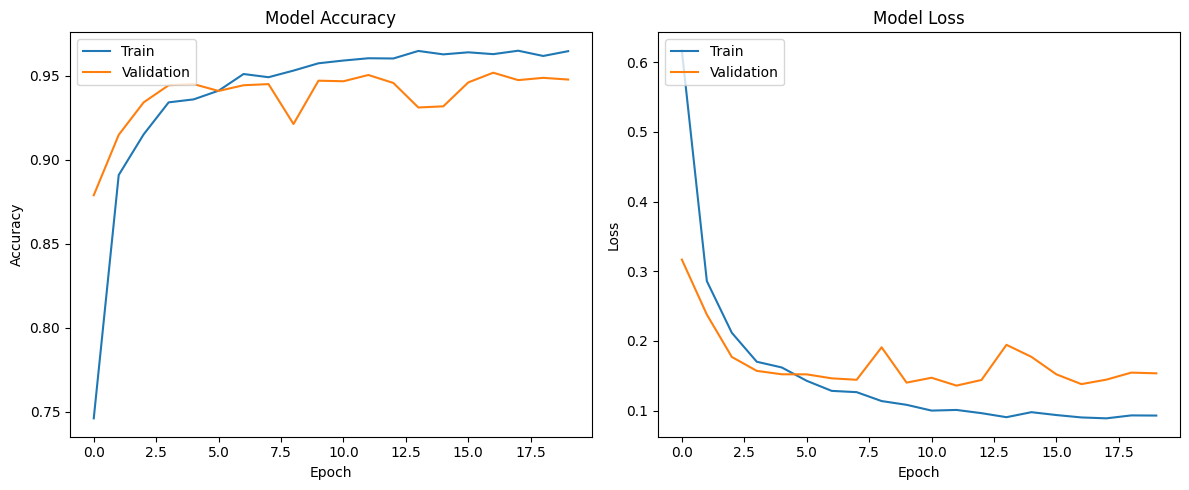

In [11]:
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [13]:
print("=== RNN 모델 최종 성능 ===")
print(f"Training Loss: {history.history['loss'][-1]:.4f}")
print(f"Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Validation Loss: {history.history['val_loss'][-1]:.4f}")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")

=== RNN 모델 최종 성능 ===
Training Loss: 0.0930
Training Accuracy: 0.9646
Validation Loss: 0.1536
Validation Accuracy: 0.9477
